<a href="https://colab.research.google.com/github/Selvapriya412004/DOCUMENT-CLUSTERING/blob/main/Document_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=5376075c054deb162db1caea889304097c832d9f8e1ba8326dee6e6361bec7a6
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:

import pandas as pd
import wikipedia
articles=['Data Science','Artificial intelligence',
          'European Central Bank','Bank','Financial technology','International Monetary Fund',
          'Basketball','Swimming']
wiki_lst=[]
title=[]
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)
print("examine content")
wiki_lst

loading content:  Data Science
loading content:  Artificial intelligence
loading content:  European Central Bank
loading content:  Bank
loading content:  Financial technology
loading content:  International Monetary Fund
loading content:  Basketball
loading content:  Swimming
examine content


['Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Specify stop words as a string 'english'
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(wiki_lst)


In [ ]:
# Access the feature names
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

# Print the shape of the TF-IDF matrix
print(X.shape)


['00' '000' '0001' ... 'zoning' 'être' 'čapek']
(8, 7337)


In [ ]:
print(X[0,])

  (0, 5476)	0.005880802327077512
  (0, 3877)	0.016707105432810385
  (0, 5309)	0.011041072942734103
  (0, 7258)	0.007394335228513484
  (0, 4632)	0.006583328398269018
  (0, 3272)	0.006583328398269018
  (0, 4127)	0.006583328398269018
  (0, 1885)	0.007394335228513484
  (0, 2251)	0.011041072942734103
  (0, 656)	0.007394335228513484
  (0, 1517)	0.011041072942734103
  (0, 1106)	0.007394335228513484
  (0, 3619)	0.013174277755518748
  (0, 6466)	0.011041072942734103
  (0, 4345)	0.013174277755518748
  (0, 364)	0.011041072942734103
  (0, 4547)	0.013174277755518748
  (0, 6935)	0.009527540041298129
  (0, 6698)	0.009527540041298129
  (0, 1768)	0.007394335228513484
  (0, 967)	0.006583328398269018
  (0, 799)	0.013174277755518748
  (0, 2320)	0.007394335228513484
  (0, 1473)	0.011041072942734103
  (0, 321)	0.007394335228513484
  :	:
  (0, 641)	0.04416429177093641
  (0, 6926)	0.011041072942734103
  (0, 2207)	0.055205364713670525
  (0, 3602)	0.013174277755518748
  (0, 6993)	0.026348555511037496
  (0, 6398)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

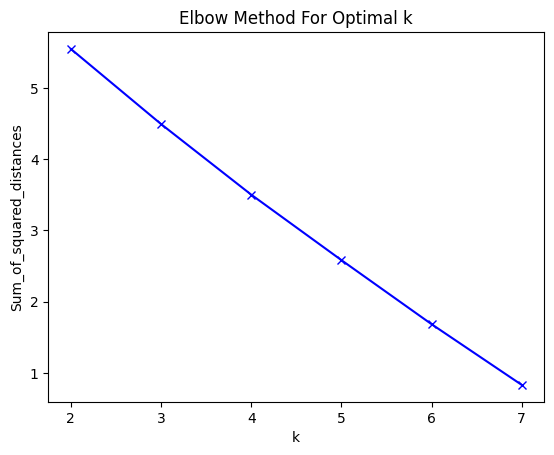

In [ ]:
Sum_of_squared_distances = []
K = range(2,8)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))


                         title  cluster
3                         Bank        0
4         Financial technology        1
0                 Data Science        2
1      Artificial intelligence        2
6                   Basketball        3
7                     Swimming        4
2        European Central Bank        5
5  International Monetary Fund        5


Cluster: 0
Titles
Bank


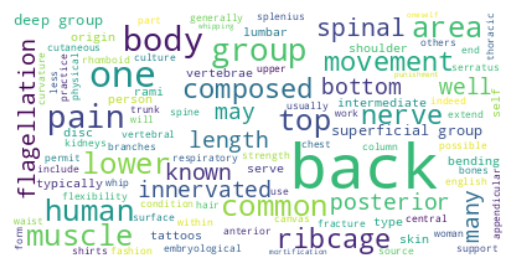

Cluster: 1
Titles
Financial technology


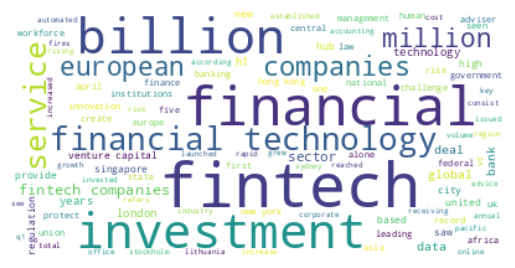

Cluster: 2
Titles
           Data Science
Artificial intelligence


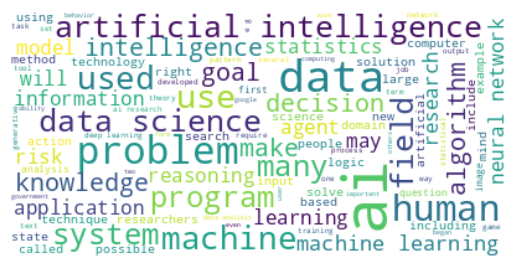

Cluster: 3
Titles
Basketball


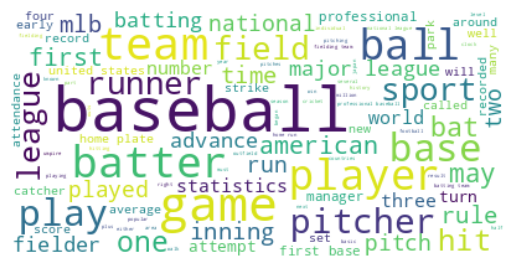

Cluster: 4
Titles
Swimming


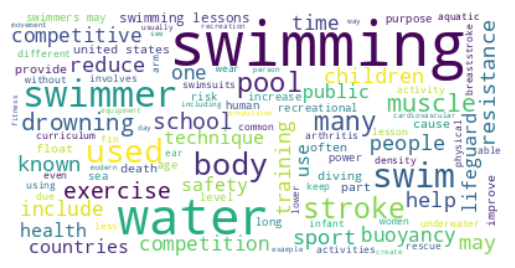

Cluster: 5
Titles
      European Central Bank
International Monetary Fund


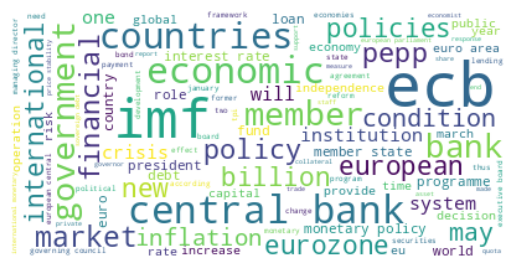

In [ ]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns


Shape of X: (8, 7337)
Adjusted perplexity: 7


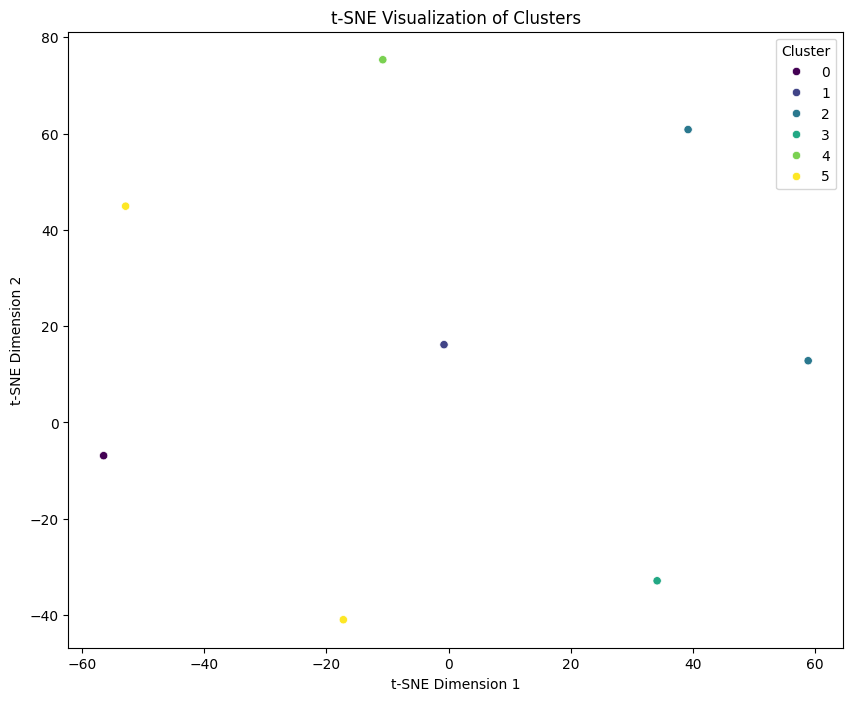

In [ ]:

# Check the shape of your data
print("Shape of X:", X.shape)

# Adjust perplexity based on the number of samples
perplexity = min(30, X.shape[0] - 1)  # Set a maximum value for perplexity
print("Adjusted perplexity:", perplexity)

# Perform dimensionality reduction for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
X_embedded = tsne.fit_transform(X.toarray())


# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=labels, palette='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster')
plt.show()

